# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Исследование состоит из пяти основных этапов: 
1. Открытие файла и первое ознакомление с данными
- изучение структуры данных с помощью вывода первых строк датафрейма
- изучение общей информации методом info()
- построение гистограмм для числовых данных
2. Предобработка данных
- обработка пропусков
- изменение типов данных в столбах
- устранение дубликатов
- обработка аномальных значений
3. Добавление новых столбцов, необходимых для анализа, в датафрейм
4. Исследовательский анализ
- изучение выборки
- построение графиков и выявление зависимости цены от различных параметров
5. Общий вывод

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
 data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*Итак, в датафрейме всего 23699 строчек об объектах недвижимости и 22 критерия, по которым они сравниваются. В дальнейшем анализе следует изучить более подробно пропуски и типы данных.*

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

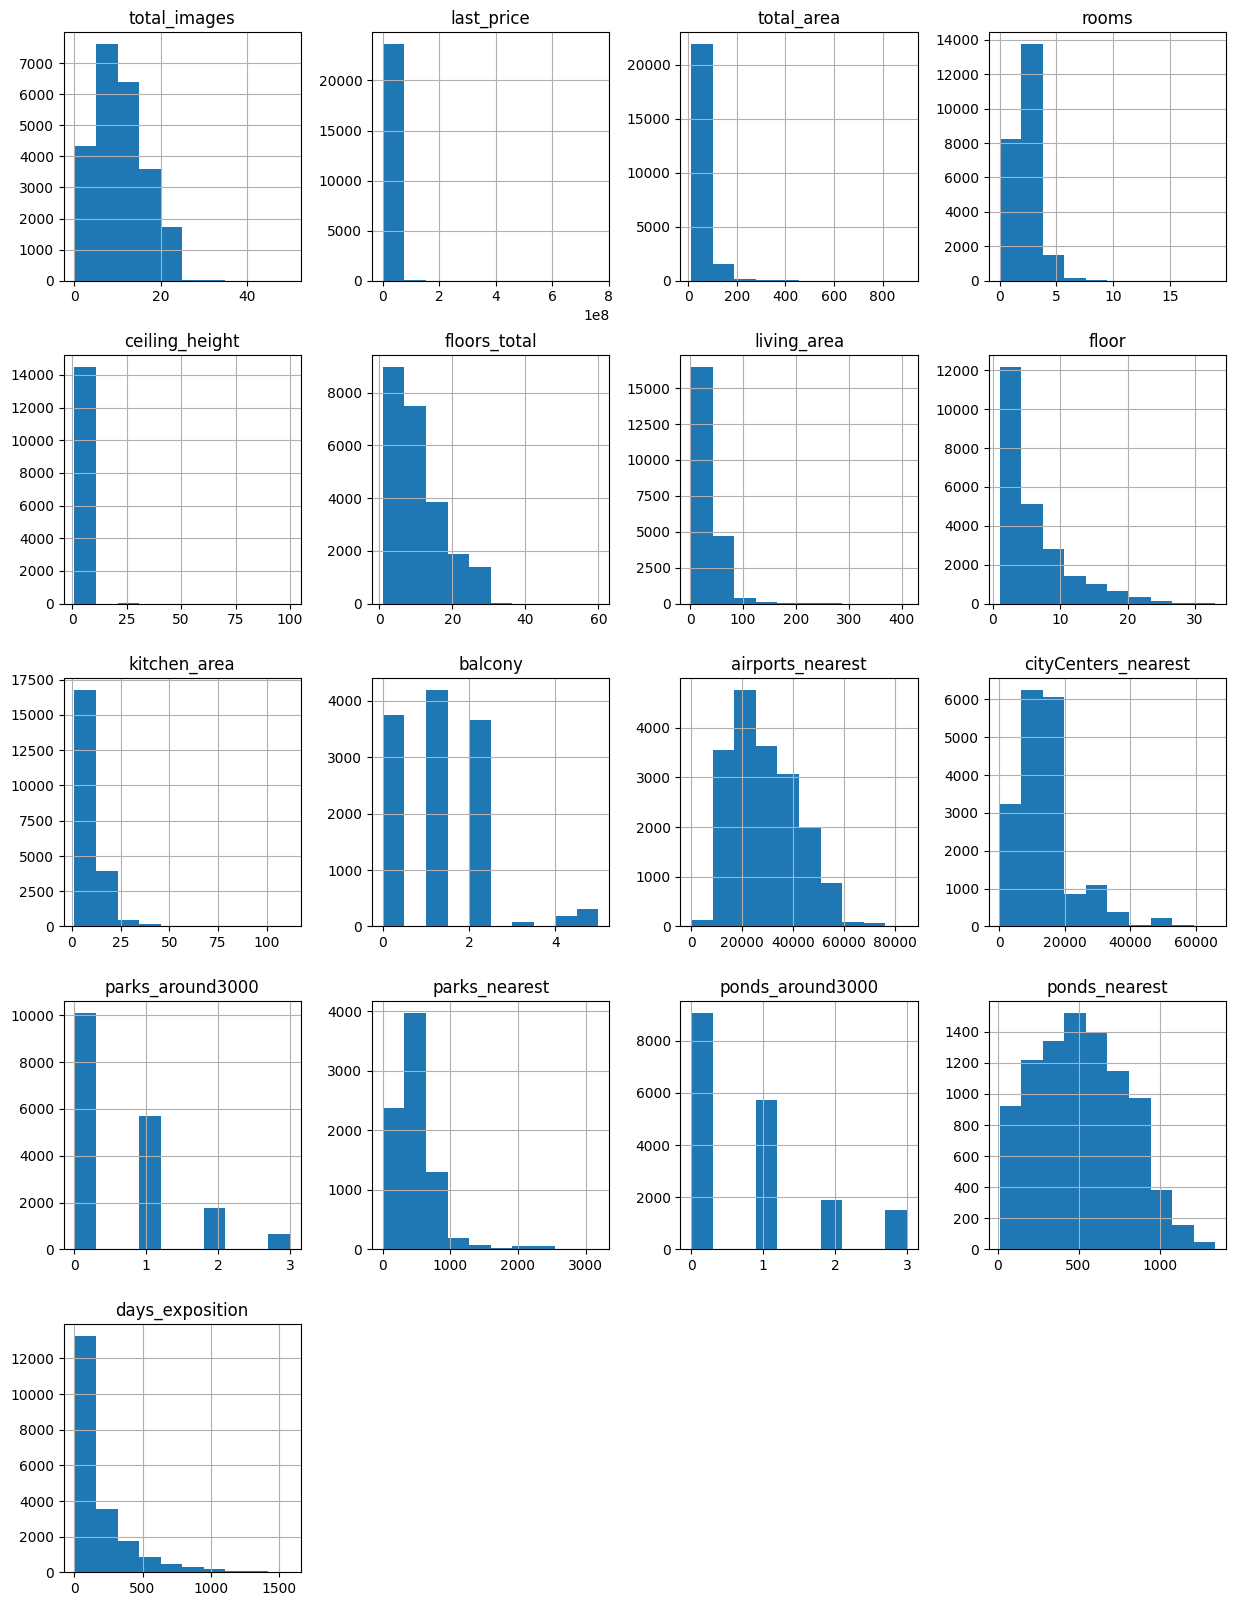

In [6]:
data.hist(figsize=(15, 20))

*Мы открыли файл с данными и сохранили его в переменной data.
<br> Далее мы изучили информацию о датафрейме с помощью метода `'info()'` и построили гистограммы по всем численным столбцам. Можно заметить, что в столбцах `ceiling_height`, `is_apartment`, `parks_neares`, `balcony`, `ponds_nearest` много пропусков, относительно всего объема данных, что нужно рассмотреть более детально. Также, необходимо изучить датасет на наличие аномальных значений и неправильных типов данных в столбцах.*

## Предобработка данных

#### Удаление пропусков

In [7]:
initial_len = len(data)

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

*Рассмотрим пропуски в столбцах `is_apartment`, `balcony`, `parks_around3000` и `ponds_around3000`. Так как эти данные вводятся пользователем, можно предположить, что пропуски означают отсутствие данных элементов. Например, если пользователь ничего не указал в параметре `balcony`, можно предположить, что в объекте недвижимости балкона нет.*

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
# data.isna().sum()

*Рассмотрим пропуски в столбце `cityCenters_nearest`. Логично предположить, что если пользователь не указал расстояние до центра города - значит, квартира находится в центре. Следовательно, пропуски в данном столбце можно заполнить нулями.*

In [10]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=0)
# data.isna().sum()

*Рассмотрим пропуски в столбце `days_exposition`. Для начала приведем формат ячеек в удобный для работы вид и выведем распределение пропусков в столбце `days_exposition` по годам*

In [11]:
# Переведем даты из столбца 'first_day_exposition' в удобный формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [12]:
days_exposition_isna = data[data['days_exposition'].isna()]
days_exposition_isna['year_of_exposition'] = days_exposition_isna['first_day_exposition'].dt.year
days_exposition_pivot = days_exposition_isna.pivot_table(index=['year_of_exposition'], values='total_area', aggfunc='count')
days_exposition_pivot.columns = ['Количество пропусков в столбце days_exposition']
days_exposition_pivot

,Количество пропусков в столбце days_exposition
year_of_exposition,
2014,18
2015,70
2016,67
2017,271
2018,959
2019,1796


*Количество пропусков в столбце `days_exposition` растет в период с 2014 по 2019. Можно предположить, что пропуск означает удаление объявления с платформы. Значит, заполнить пропуски в данной колонке мы не можем, так как квартира не была продана и неизвестна дата удаления объявления.*

*Значения в столбцах `living_area` и `kitchen_area` можно заполнить медианным значением, так как медиана более устойчива к выбросам и качество данных не сильно пострадает. Однако, нельзя заполнять пропуски медианными значениями по всей выборке, так как данные в указанных столбцах могут зависеть от значения `total_area`. Для начала, исследуем зависимость жилой площади и площади кухни от общей площади отдельно.* 

Корреляция жилой и общей площадей: 0.94
Корреляция площади кухни и общей площади: 0.61


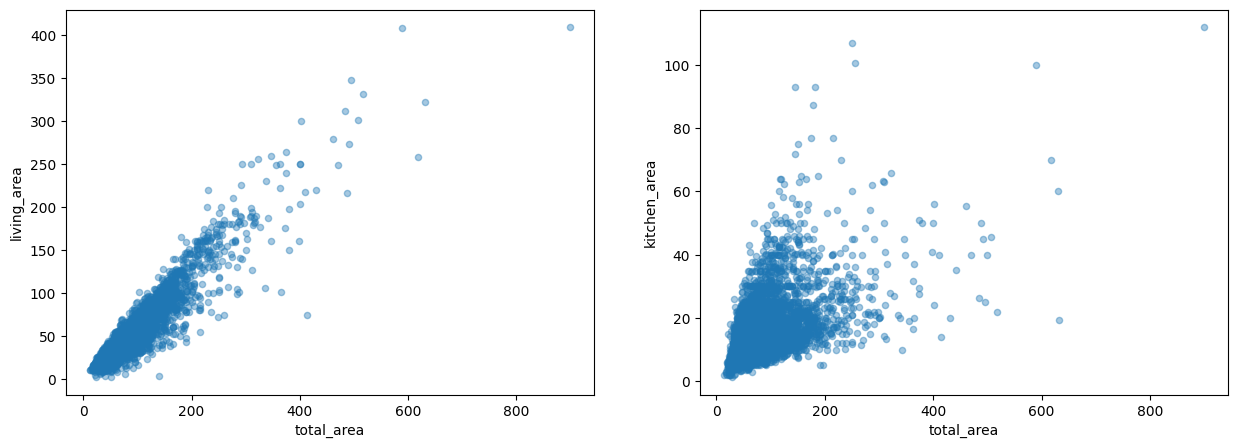

In [13]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
data.plot(x='total_area', y='living_area', kind='scatter', ax=axes[0], alpha=0.4)
data.plot(x='total_area', y='kitchen_area', kind='scatter', ax=axes[1], alpha=0.4)
print('Корреляция жилой и общей площадей:', round(data['living_area'].corr(data['total_area']), 2))
print('Корреляция площади кухни и общей площади:', round(data['kitchen_area'].corr(data['total_area']),2))

*В первом случае прослеживается сильная линейная зависимость между жилой и общей площадами. Во втором случае зависимость не такая сильная, нужно исследовать корреляцию с другуми величинами датафрейма. Сначала, заполним пропуски в столбце `living_area`. Для этоого нужно разбить данные на группы по общей площади и заполнить медианным значением для каждого промежутка.*

In [14]:
# Напишем функцию для категоризации данных по площади
def total_area_category(area):
    if area < 100:
        return 'A'
    if 100 <= area < 200:
        return 'B'
    elif 200 <= area < 300:
        return 'C'
    elif 300 <= area < 400:
        return 'D'
    elif 400<= area < 500:
        return 'E'
    elif 500 <= area < 600:
        return 'F'
    elif 600 <= area < 700:
        return 'G'
    elif 700 <= area < 800:
        return 'H'
    else:
        return 'I'

In [15]:
# Создадим таблицу с жилой и общей площадами
# Применим функцию total_area_category(area)  к столбцу 'total_area' и сохраним результат в столбце 'category'
# Добавим отношение жилой площади к общей в столбец 'relative'
relative_area = pd.DataFrame(data=data, columns=['living_area', 'total_area'])
relative_area['category'] = relative_area['total_area'].apply(total_area_category)
relative_area['relative'] = relative_area['living_area'] / relative_area['total_area']
# relative_area.head()

In [16]:
# Заполним пропуски в таблице relative_area в столбце 'living_area' и перенесем значения в таблицу data
for category in relative_area['category'].unique():
    relative_area.loc[(relative_area['living_area'].isna()) & (relative_area['category'] == category), 'living_area'] = \
    relative_area.loc[relative_area['category'] == category, 'relative'].median() * relative_area['total_area']
# relative_area.head()
data['living_area'] = relative_area['living_area']
# data.isna().sum()

In [17]:
# Проверим, чтобы при заполнении пропусков сумма жилой площади и площади кухни не превышала значение общей площади
print('Количество строк, где сумма жилой площади и площади кухни превышает значение общей площади:', \
     len(data.query('living_area + kitchen_area > total_area')))

Количество строк, где сумма жилой площади и площади кухни превышает значение общей площади: 73


*Количество строк с нарушением указанного условия суммы площадей - 64, что составляет малый процент относительно всего датасета. Данные строки можно удалить*

In [18]:
data = data.loc[((data['living_area'] + data['kitchen_area']) <= data['total_area']) | (data['kitchen_area'].isna())]
# len(data)

*Рассмоотрим корреляцию между площадью кухни и другими величинами*

In [19]:
data.corr()['kitchen_area']

total_images           0.104590
last_price             0.521863
total_area             0.612800
rooms                  0.272057
ceiling_height         0.090733
floors_total           0.165624
living_area            0.437492
floor                  0.136098
is_apartment           0.043353
studio                      NaN
open_plan                   NaN
kitchen_area           1.000000
balcony                0.044889
airports_nearest       0.008322
cityCenters_nearest   -0.067783
parks_around3000       0.118850
parks_nearest          0.029667
ponds_around3000       0.175750
ponds_nearest         -0.105683
days_exposition        0.101242
Name: kitchen_area, dtype: float64

*Так как самая большая корреляция у площади кухни только с общей площадью, но она не достаточная, можно сделать вывод, что пропуски в столбце `kitchen_area` мы заполнить не можем.*

In [20]:
print('Пропуски в столбце kitchen_area составляют', int(data['kitchen_area'].isna().sum() / len(data) * 100), '%')

Пропуски в столбце kitchen_area составляют 9 %


*Рассмотрим пропуски в столбце `ceiling_height`.*

In [21]:
data['ceiling_height'].describe()

count    14458.000000
mean         2.768110
std          1.229667
min          1.000000
25%          2.512500
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

*Можно заметить очень странные значения в виде максимума в 100м и минимума в 1м. Видимо, при выгруке или сборе данных возникла ошибка. Предположим, что аномальной считается высота больше 8 метров, исходя из логики, что в квартире может быть соединено 2 этажа, или ниже 2.4 метров.*

In [22]:
data.query('ceiling_height > 8 | ceiling_height < 2.4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000.0,47.00,2018-01-12,3,2.34,5.0,26.621195,1,False,...,NaN,0.0,посёлок Новый Свет,NaN,0.0,0.0,NaN,0.0,NaN,45.0
355,17,3600000.0,55.20,2018-07-12,2,25.00,5.0,32.000000,2,False,...,NaN,2.0,Гатчина,NaN,0.0,0.0,NaN,0.0,NaN,259.0
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,False,...,6.50,0.0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1582,4,4100000.0,45.60,2016-01-13,2,2.30,9.0,28.400000,8,False,...,7.00,2.0,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.000000,4,False,...,6.00,1.0,Луга,NaN,0.0,0.0,NaN,0.0,NaN,NaN
3148,14,2900000.0,75.00,2018-11-12,3,32.00,3.0,53.000000,2,False,...,8.00,0.0,Волхов,NaN,0.0,0.0,NaN,0.0,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.600000,9,False,...,8.80,2.0,Тосно,NaN,0.0,0.0,NaN,0.0,NaN,36.0
4643,0,4300000.0,45.00,2018-02-01,2,25.00,9.0,30.000000,2,False,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.00,2017-09-27,0,27.00,25.0,17.000000,17,False,...,NaN,2.0,посёлок Мурино,NaN,0.0,0.0,NaN,0.0,NaN,28.0
5076,0,3850000.0,30.50,2018-10-03,1,24.00,5.0,19.500000,1,True,...,5.50,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


In [23]:
# Значения выше 24 метров нужно разделить на 10, так как скорее всего при вводе данных была утеряна точка
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] /= 10

In [24]:
# Выведем оставшееся количество аномальных значений потолка
len(data.query('ceiling_height < 2.4 | ceiling_height > 8'))

27

In [25]:
# Удалим странные значения потолка меньше 2 или больше 8 метров, так как их немного относительно общего объема данных
data = data.loc[((data['ceiling_height'] > 2.4) & (data['ceiling_height'] < 8)) | (data['ceiling_height'].isna())]
# data['ceiling_height'].describe()

*Теперь можно рассмотреть пропуски. Выведем корреляцию высоты потолка с другими столбцами датасета*

In [26]:
data.corr()['ceiling_height']

total_images           0.045732
last_price             0.399786
total_area             0.483922
rooms                  0.298246
ceiling_height         1.000000
floors_total          -0.096700
living_area            0.459464
floor                 -0.047994
is_apartment           0.067899
studio                 0.019145
open_plan              0.011643
kitchen_area           0.420702
balcony               -0.076443
airports_nearest      -0.106371
cityCenters_nearest   -0.187473
parks_around3000       0.297729
parks_nearest         -0.058478
ponds_around3000       0.265144
ponds_nearest         -0.142258
days_exposition        0.129583
Name: ceiling_height, dtype: float64

*Так как отсутствует достаточная корреляция, можно сделать вывод о том, что пропуски в значениях высоты потолка мы заполнить не можем*

*Рассмотрим пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`. Так как эти данные являются картографическими, а не указываются пользователем, то скорее всего отсутствие значений в данных столбцах указывает на наличие технической ошибки при сборе/выгрузке данных. Пропуски в данных столбцах мы заполнить не можем.*

*Количествo пропусков в столбцах `locality_name` и `floors_total` слишком маленькое, относительно общего количества данных. Значит, строчки с отсутствием данных в данном столбце можно удалить, так как это не сильно исказит дальнейший анализ.*

In [27]:
data = data.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)
# data.isna().sum()

In [28]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9057
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2214
balcony                     0
locality_name               0
airports_nearest         5477
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15449
ponds_around3000            0
ponds_nearest           14443
days_exposition          3153
dtype: int64

In [29]:
data = data.reset_index(drop=True)

**В итоге, нужно предупредить разработчиков, ответственных за выгрузку данных, о пропусках в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest`. Также, не удалось заполнить пропуски в столбцах `ceiling_height`, `kitchen_area` из-за отсутствия корреляции с другими столбцами и `days_exposition` из-за отсутствии информации о дате удаления объявления**

#### Изменение типов данных

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23438 entries, 0 to 23437
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23438 non-null  int64         
 1   last_price            23438 non-null  float64       
 2   total_area            23438 non-null  float64       
 3   first_day_exposition  23438 non-null  datetime64[ns]
 4   rooms                 23438 non-null  int64         
 5   ceiling_height        14381 non-null  float64       
 6   floors_total          23438 non-null  float64       
 7   living_area           23438 non-null  float64       
 8   floor                 23438 non-null  int64         
 9   is_apartment          23438 non-null  bool          
 10  studio                23438 non-null  bool          
 11  open_plan             23438 non-null  bool          
 12  kitchen_area          21224 non-null  float64       
 13  balcony         

*Нужно изменить тип данных значений в столбцах `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`.*

In [31]:
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['is_apartment'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

# Для устранения ошибок при преобразовании заполним пропуски в столбцах days_exposition и last_price нулями
# После преобразования вернем значения NaN

data['days_exposition'] = data['days_exposition'].fillna(value=0)
data['days_exposition'] = data['days_exposition'].astype('int64')
data[data['days_exposition'] == 0]['days_exposition'] = np.nan

data['last_price'] = data['last_price'].fillna(value=0)
data['last_price'] = data['last_price'].astype('int64')
data[data['last_price'] == 0]['last_price'] = np.nan
# data.info()
# data.head()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23438 entries, 0 to 23437
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23438 non-null  int64         
 1   last_price            23438 non-null  int64         
 2   total_area            23438 non-null  float64       
 3   first_day_exposition  23438 non-null  datetime64[ns]
 4   rooms                 23438 non-null  int64         
 5   ceiling_height        14381 non-null  float64       
 6   floors_total          23438 non-null  int64         
 7   living_area           23438 non-null  float64       
 8   floor                 23438 non-null  int64         
 9   is_apartment          23438 non-null  bool          
 10  studio                23438 non-null  bool          
 11  open_plan             23438 non-null  bool          
 12  kitchen_area          21224 non-null  float64       
 13  balcony         

#### Устранение дубликатов

In [33]:
data.duplicated().sum()

0

In [34]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [35]:
# Для начала, заменим все буквы 'ё' на 'е'

data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('ё', 'е'))
# data['locality_name'].unique()

*Далее, анализируя названия начеленных пунктов в списке с уникальными значениями, можно прийти к выводу о наличии главных типов поселения: 'деревня', 'поселок', 'товарищество', 'село'. Следовательно, необходимо создать новый столбец в датафрейме с типом населенного пункта и его названием.*

In [36]:
# Напишем функцию, которая принимает строчку в качестве аргумента
# Функция возвращает только слова, начинающиеся с заглавной буквы

def upper_letter_words(string):
    splitted = string.split()
    word = ''
    
    for elem in splitted:
        if elem[0].isupper() == True:
            word =  word + elem + ' '
            
    return word

In [37]:
# Применим функцию upper_letter_words к списку с уникальными значениями из столбца 'locality_name'

names = []

for name in data['locality_name'].unique():
    names.append(upper_letter_words(name))
    
# Создадим датафрейм названием населенного пункта и полным названием
    
names = pd.DataFrame(data=names, columns=['name'])
names['full_name'] = data['locality_name'].unique()

names

,name,full_name
0,Санкт-Петербург,Санкт-Петербург
1,Шушары,поселок Шушары
2,Янино-1,городской поселок Янино-1
3,Парголово,поселок Парголово
4,Мурино,поселок Мурино
...,...,...
325,Нижняя,деревня Нижняя
326,Лесное,коттеджный поселок Лесное
327,Тихковицы,деревня Тихковицы
328,Борисова Грива,деревня Борисова Грива


In [38]:
# Извлечем из полного названия тип населенного пункта и добавим в столбец 'types' датафрейма с названиями
# Добавим столбец 'new_full_name', состоящий из названия и типа поселения

types = ['деревня', 'товарищество', 'село', 'поселок']
names['types'] = ''
names['new_full_name'] = ''

for i in range(len(names)):
    
    if str(names['name'][i])[-1] == ' ':
        names['name'][i] = str(names['name'][i])[:-1]
        
    if str(names['name'][i])[0] == ' ':
        names['name'][i] = str(names['name'][i])[1:]
        
    for elem in types:
        if elem in names['full_name'][i]:
            names['types'][i] = elem
            
    names['new_full_name'][i] = names['types'][i] + ' ' + names['name'][i]
        
# names

In [39]:
# Добавим столбец с булевыми переменными, обозначающими, что в столбце 'name' есть дубликат

names['is_duplicated'] = names['name'].duplicated()
# names

In [40]:
# Удалим только дубликаты без типа населенного пункта, так как они могут нам помешать получить правильно полное название

for i in range(len(names)):
    if names['is_duplicated'][i] == True and names['types'][i] == '':
        names = names.drop(index=[i])

In [41]:
# Удалим все оставшиеся дубликаты

names = names.drop_duplicates(subset=['name']).reset_index(drop=True)
names

,name,full_name,types,new_full_name,is_duplicated
0,Санкт-Петербург,Санкт-Петербург,,Санкт-Петербург,False
1,Шушары,поселок Шушары,поселок,поселок Шушары,False
2,Янино-1,городской поселок Янино-1,поселок,поселок Янино-1,False
3,Парголово,поселок Парголово,поселок,поселок Парголово,False
4,Мурино,поселок Мурино,поселок,поселок Мурино,False
...,...,...,...,...,...
300,Володарское,поселок Володарское,поселок,поселок Володарское,False
301,Нижняя,деревня Нижняя,деревня,деревня Нижняя,False
302,Тихковицы,деревня Тихковицы,деревня,деревня Тихковицы,False
303,Борисова Грива,деревня Борисова Грива,деревня,деревня Борисова Грива,False


In [42]:
# Напишем функцию, которая возвращает новое полное название населенного пункта

def locality_filler(local):
    for i in range(len(names)):
        if names['name'][i] in local:
            return names['new_full_name'][i]

In [43]:
# Создадим новый столбец 'adjusted_locality_name' в исходном датафрейме и заполним его получившимися названиями

data['adjusted_locality_name'] = data['locality_name'].apply(locality_filler)
# data.head()

#### Обработка аномальных значений

*Рассмотрим аномальные значения в столбце `total_area`. Выведем на экран общую информацию о данном столбце*

In [44]:
data['total_area'].describe()

count    23438.00000
mean        60.38262
std         35.72080
min         12.00000
25%         40.00000
50%         52.00000
75%         69.90000
max        900.00000
Name: total_area, dtype: float64

*Заметны странные значения в минимуме, так как квартиры размеров в 14 квадратных метров скорее всего не бывает. Сделаем допущение, что минимальная возможная площадь - 45 квадратных метров для двухкомнатной квартиры.*

In [45]:
print('Аномальные значения составляют', round(len(data.query('total_area < 45 and rooms > 2')) / len(data) * 100, 1), \
      '% от всей выборки')

Аномальные значения составляют 0.3 % от всей выборки


*Процент не такой большой - значит, можно удалить выбивающиеся строчки*

In [46]:
data = data.query('~(total_area < 45 and rooms > 2)')

*Рассмотрим аномальные значения в столбце `rooms`. Выведем на экран общую информацию о данном столбце*

In [47]:
data['rooms'].describe()

count    23358.000000
mean         2.068842
std          1.080034
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

*Наличие максимума в 19 комнат при 3м квартиле в 3 комнаты сигнализирует о наличии выбросов. Посчитаем количество данных выбросов относительно всей выборки (условие выброса определяем как `Q3 + 1.5IQR`). Сделаем допущение, что минимальная площадь квартиры для наличие достаточного количества комнат составляет 300 квадратных метров*

In [48]:
print('Аномальные значения составляют', round(len(data.query('rooms > 6 and total_area < 300')) / len(data) * 100, 1), \
      '% от всей выборки')

Аномальные значения составляют 0.3 % от всей выборки


*Процент не такой большой - значит, можно удалить выбивающиеся строчки*

In [49]:
data = data.query('~(rooms > 6 and total_area < 300)')

*Также, странными можно назвать объекты недвижимости, площадь которых боьльшая, а количество комнат - маленькое. Проверим, сколько таких строчек в датасете относительно общего объема*

In [50]:
print('Аномальные значения составляют', round(len(data.query('total_area > 300 and rooms <= 6')) / len(data) * 100, 1), \
      '% от всей выборки')

Аномальные значения составляют 0.1 % от всей выборки


*Так как таких строчек немного относительно общего объема датасета, их можно удалить.*

In [51]:
data = data.query('~(total_area > 300 and rooms <= 6)')

*Проверим, сколько данных мы удалили, по сравнению с изначальным объемом данных*

In [52]:
new_len = len(data)
percentage_deleted = (initial_len - new_len) / initial_len
print(f'После обработки, было удалено {percentage_deleted:.2%} данных')

После обработки, было удалено 1.84% данных


### Посчитайте и добавьте в таблицу новые столбцы

In [53]:
data['price_per_meter'] = data['last_price'] / data['total_area']

In [54]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

In [55]:
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [56]:
data['floor_type'] = data.apply(type_of_floor, axis=1)

In [57]:
data['km_distance_centre'] = data['cityCenters_nearest'] / 1000
data['km_distance_centre'] = data['km_distance_centre'].astype('int')

In [58]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,adjusted_locality_name,price_per_meter,exposition_weekday,exposition_month,exposition_year,floor_type,km_distance_centre
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,0,Санкт-Петербург,120370.370370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81,поселок Шушары,82920.792079,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558,Санкт-Петербург,92785.714286,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,NaN,14,93.533625,9,False,...,3,234.0,424,Санкт-Петербург,408176.100629,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,Санкт-Петербург,100000.000000,1,6,2018,другой,8


### Проведите исследовательский анализ данных

#### Изучение параметров объектов недвижимости из выборки более подробно

In [59]:
data['total_area'].describe()

count    23263.000000
mean        59.593534
std         32.624913
min         12.000000
25%         40.000000
50%         52.000000
75%         69.350000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

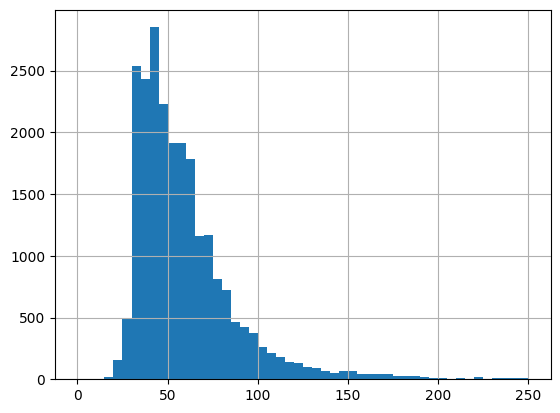

In [60]:
data['total_area'].hist(bins=50, range=(0, 250))

*Треть значений общей площади, судя по третьему персентилю, меньше 70. На диаграмме четко прослеживается тренд около 45 квадратных метров. Общее распределение напомниает распределение Пуассона.*

In [61]:
data['living_area'].describe()

count    23263.000000
mean        34.072488
std         20.587602
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

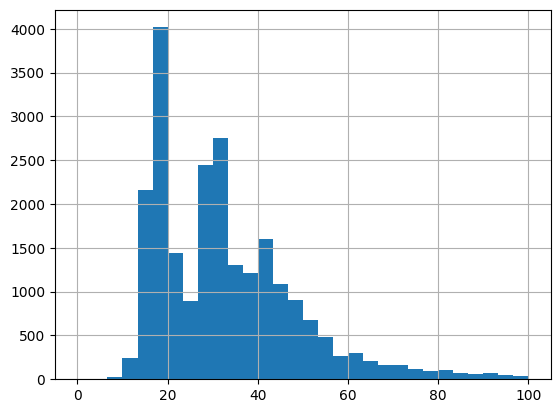

In [62]:
data['living_area'].hist(bins=30, range=(0, 100))

*У значений жилой площади наблюдается пик около 20 квдратных метров. Также, можно выделить часто встречающиеся значения около 30 и 40 квадратных метров. Это ожидаемый результат, так как для большинства выборки значение общей площади меньше 70 квадратных метров.*

In [63]:
data['kitchen_area'].describe()

count    21074.000000
mean        10.503853
std          5.744480
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

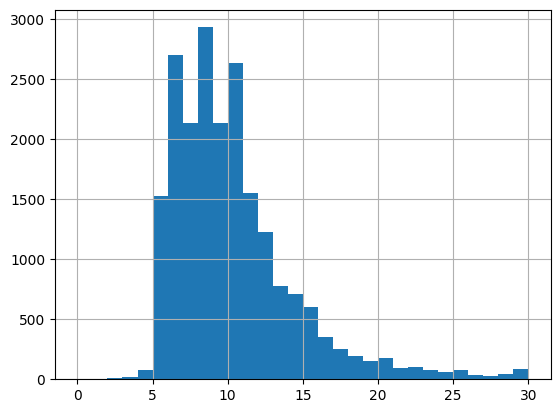

In [64]:
data['kitchen_area'].hist(bins=30, range=(0, 30))

*На гистограмме присутствует три пика, все из которых меньше 11 квадратных метров. Это ожидаемый результат, так как большая часть выборки имеет общую площадь меньше 70 квадратных метров. Получившееся распределение также напоминает распределение Пуассона.*

In [65]:
data['last_price'].describe()

count    2.326300e+04
mean     6.391432e+06
std      9.999051e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

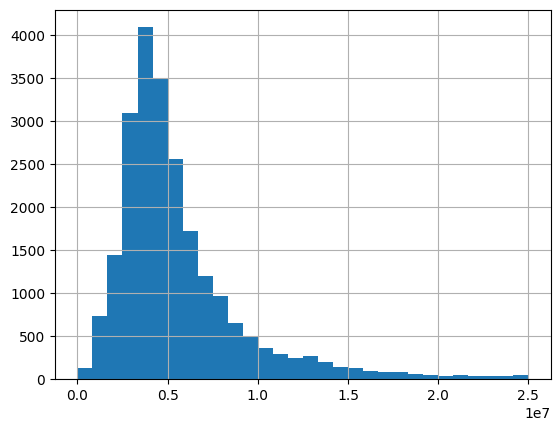

In [66]:
data['last_price'].hist(bins=30, range=(0, 0.25e8))

*Гистограмма напомниает распределение Пуассона. Пик значений цены приходится примерно на 4 миллиона рублей, на что также указывает медиана в 4.7 миллиона рублей.*

In [67]:
data['rooms'].describe()

count    23263.000000
mean         2.049736
std          1.031101
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

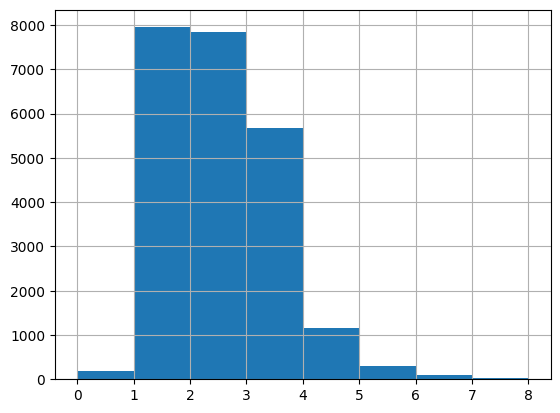

In [68]:
data['rooms'].hist(bins=8, range=(0, 8))

*По гистограмме видно, что в большинство квартир из выборки однокомнатные или двухкомнатные. Этот результат также можно было ожидать при ранее указанных значениях большинтства объектов недвижимости из выборки.*

In [69]:
data['ceiling_height'].describe()

count    14261.000000
mean         2.725108
std          0.272256
min          2.450000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

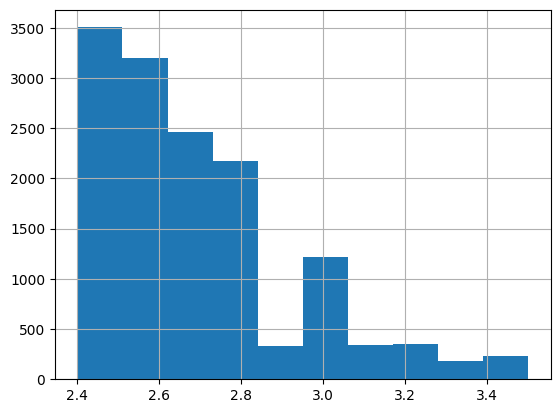

In [70]:
data['ceiling_height'].hist(bins=10, range=(2.4, 3.5))

*Количество потолков с указанной высотой убывает при росте высоты потолка, не считая значения в 2.9 метров. Разброс в данных не такой большой, не считая пика, на это указывает небольшое стандартное отклонение.*

In [71]:
data['floor'].describe()

count    23263.000000
mean         5.891244
std          4.879666
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

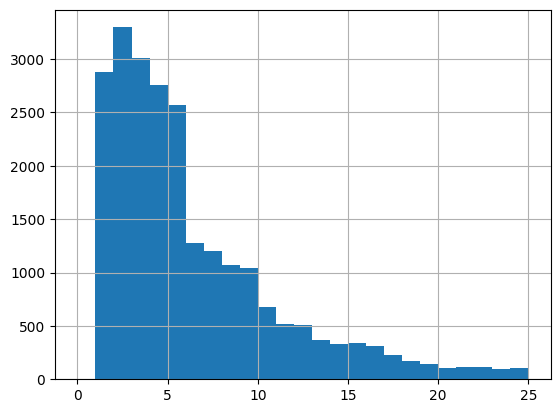

In [72]:
data['floor'].hist(bins=25, range=(0, 25))

*Судя по гистограмме, много квартир находится на первых пяти этажах. Возможно, в выборке присутствует много пятиэтажных домов. Нужно изучить стобец `floors_total` для дальнейших выводов.*

<AxesSubplot:>

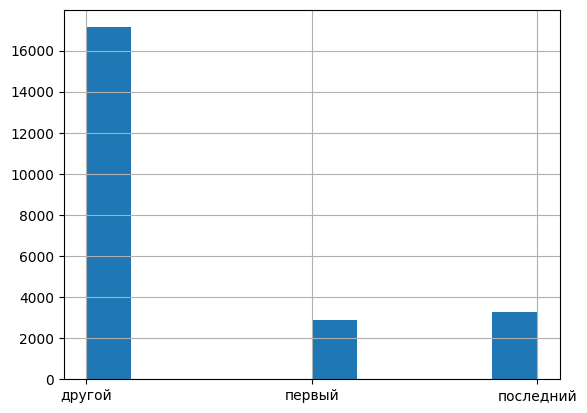

In [73]:
data['floor_type'].hist()

*Большинство квартир из выборки находятся на этажах, кроме первого и последнего.*

In [74]:
data['floors_total'].describe()

count    23263.000000
mean        10.714998
std          6.597517
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

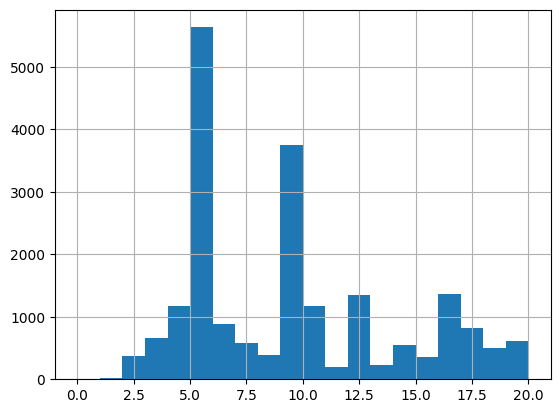

In [75]:
data['floors_total'].hist(bins=20, range=(0, 20))

*Возвращаясь к утверждению, что в выборке присутствует много квартир с первых пяти этажей, гистограмма действительно указывает на то, что в выборке много пятиэтажных домов. Также, прослеживается второй пик в виде девятиэтажных домов, но их уже поменьше. Гистограмма и большое стандартное отклонение указывают на большой разброс в данных по общему количеству этажей в выборке.*

In [76]:
data['cityCenters_nearest'].describe()

count    23263.000000
mean     10902.192151
std       9655.956628
min          0.000000
25%       2166.500000
50%      11269.000000
75%      15264.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

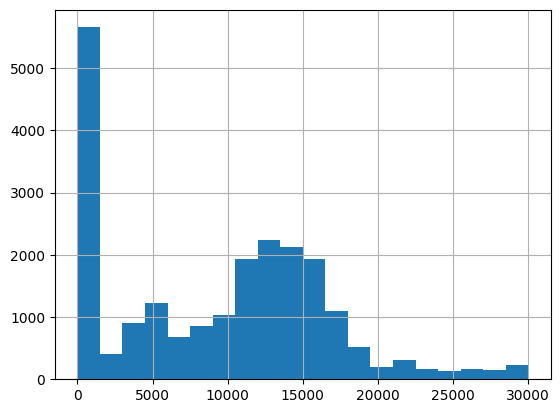

In [77]:
data['cityCenters_nearest'].hist(bins=20, range=(0, 30000))

*В выборке присутстсвует много квартир, находящихся в центре, о чем сигнализирует пик около нуля. Большое стандартное отклонение и форма распределение (гистограмма) указывают на большой разброс в данных о расстоянии до центра. Если не брать в расчет квартиры, расположенные в центре, в выборке присутствует два пика: около 5 км и около 12.5 км.*

In [78]:
data['airports_nearest'].describe()

count    17795.000000
mean     28879.976117
std      12642.282689
min          0.000000
25%      18621.000000
50%      26884.000000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

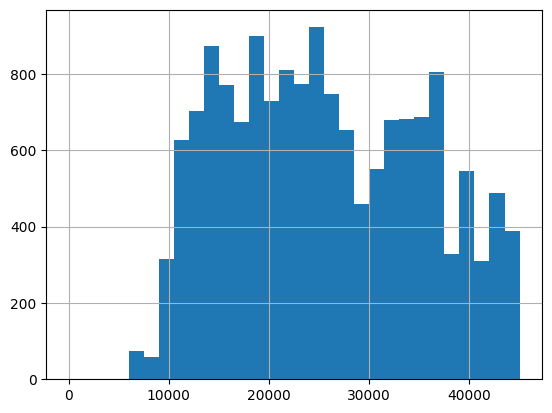

In [79]:
data['airports_nearest'].hist(bins=30, range=(0, 45000))

*В данных о расстоянии до аэропорта очень большой разброс, о чем сигнализирует большое стандартное отклонение. Присутствует много пиков на гистограмме. Примерно у одной трети значений из выборки расстояние до аэропорта не больше 37.4 км, что можно понять на третьему персентилю.*

In [80]:
data['parks_nearest'].describe()

count    7898.00000
mean      491.35452
std       342.59874
min         1.00000
25%       288.00000
50%       455.00000
75%       612.75000
max      3190.00000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

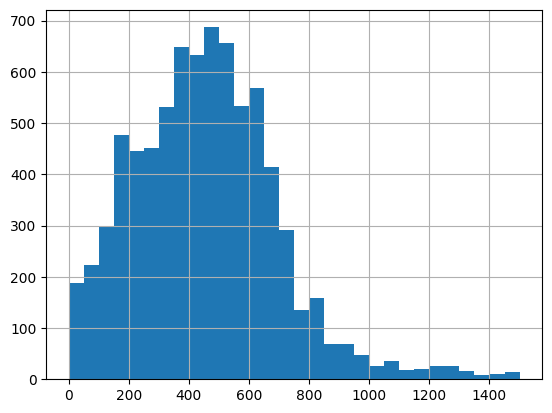

In [81]:
data['parks_nearest'].hist(bins=30, range=(0, 1500))

*Судя по гистограмме, распределение расстояний до ближайшего парка у квартир из выборки напоминает распределение Пуассона. Наблюдается пик около 450 метров, примерно равный медиане.*

In [82]:
days = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
data['exposition_day_written'] = data['exposition_weekday'].apply(lambda x: days[x])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(0, понедельник)'),
  Text(1, 0, '(1, вторник)'),
  Text(2, 0, '(2, среда)'),
  Text(3, 0, '(3, четверг)'),
  Text(4, 0, '(4, пятница)'),
  Text(5, 0, '(5, суббота)'),
  Text(6, 0, '(6, воскресенье)')])

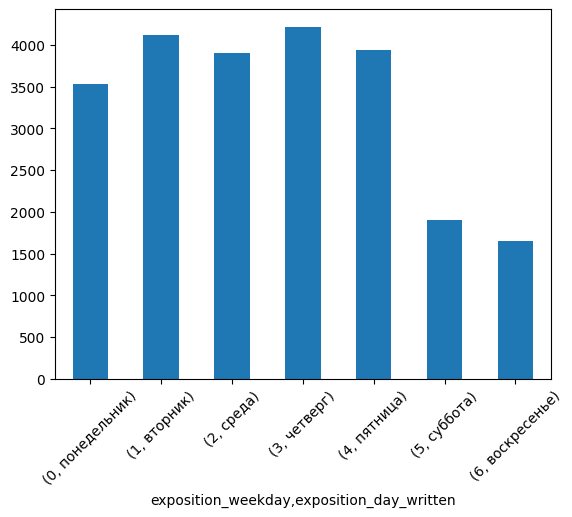

In [83]:
data.groupby('exposition_weekday')['exposition_day_written'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

*Большинство объявлений по квартирам из выборки размещались по будним дням. На выходных прослеживается спад размещения объявлений.*

<AxesSubplot:>

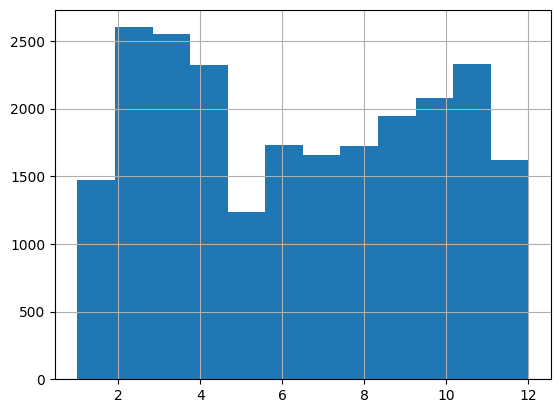

In [84]:
data['exposition_month'].hist(bins=12)

*Данные по месяцу размещения объявления распределены неравномерно. Наблюдается два пика: с февраля по апрель и в ноябре.*

#### Изучение, насколько быстро продавались квартиры

In [85]:
data['days_exposition'].describe()

count    23263.00000
mean       156.38817
std        213.28031
min          0.00000
25%         22.00000
50%         73.00000
75%        198.00000
max       1580.00000
Name: days_exposition, dtype: float64

Среднее количество дней, в течение которых продавалась квартира: 156.39
Медианное значение дней, в течение которых продавалась квартира: 73.0


<AxesSubplot:>

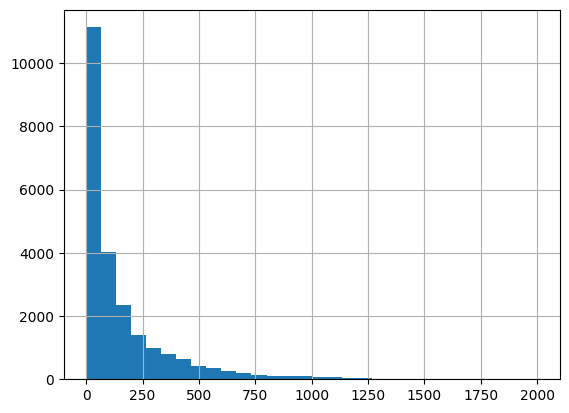

In [86]:
mean_days_exposition = round(data['days_exposition'].mean(), 2)
median_days_exposition = data['days_exposition'].median()
print(f'Среднее количество дней, в течение которых продавалась квартира: {mean_days_exposition}')
print(f'Медианное значение дней, в течение которых продавалась квартира: {median_days_exposition}')
data['days_exposition'].hist(bins=30, range=(0, 2000))

*Распределение количества дней, в течение которых продавались квартиры, убывающее: половина покупок совершались примерно в течение первых 3 месяцев, судя по медиане. Основываясь на полученных данных, можно назвать быстрами такие продажи, которые занимали меньше 45 дней (что примерно составляет 1.5 месяца), основывась на первом персентиле (так как только около одной четверти выборки продавались в течение указанного времени), а долгими - которые занимали больше 231 дня (или примерно больше 8 месяцев), основываясь на третьем персентиле (так как только одна четверть продаж занимала более указанного промежутка времени).*

#### Изучение факторов, влияющих на стоимость объекта недвижимости

*Так как значений в датафрейме очень много, для выявления зависимости цены `last_price` от различных факторов будем строить графики медианных значений цены в сгруппированных по данному фактору данных.*

In [87]:
# Создадим функцию, которая выводит корреляцию между заданным фактором и ценой объекта недвижимости

def corr_print(factor):
    corr = round(data['last_price'].corr(data[factor]), 2)
    print(f'Корреляция между {factor} и ценой за объект недвижимости: {corr}')

In [88]:
# Создадим функцию, которая создает сводную таблицу со столбцами из заданного фактора и медианными значениями цены
# Функция выводит график scatter 
# В параметрах задаем максимальные и минимальные значения х и у
# При построении графиков, будем выбирать такие границу х и у, чтобы захватить большинство выборки и чтобы хорошо прослеживалась зависимость (или ее отсутствие)

def plotting_function(factor, xmax, xmin, ymin, ymax):
    pivot = data.pivot_table(index=[factor], values='last_price', aggfunc=['median'])
    pivot.columns = ['median_last_price']
    pivot = pivot.reset_index()
    
    pivot = pivot[pivot[factor] >= xmin]
    pivot = pivot[pivot[factor] <= xmax]
    
    pivot = pivot[pivot['median_last_price'] >= ymin]
    pivot = pivot[pivot['median_last_price'] <= ymax]
    
    pivot.plot(x=factor, y='median_last_price', kind='scatter', alpha=0.4)

In [89]:
def plotting_bar(factor, xmin, xmax):
    pivot = data.pivot_table(index=[factor], values='last_price', aggfunc='median')
    pivot.columns = ['last_price_median']
    pivot = pivot.reset_index()
    
    pivot = pivot[pivot[factor] >= xmin]
    pivot = pivot[pivot[factor] <= xmax]
    
    plt.bar(x=pivot[factor], height=pivot['last_price_median'])

Корреляция между total_area и ценой за объект недвижимости: 0.64


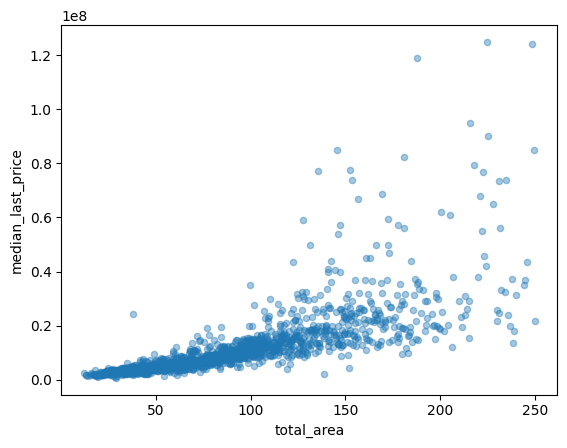

In [90]:
corr_print('total_area')

plotting_function('total_area', xmax=250, xmin=0, ymin=0, ymax=1.25e8)

*Судя по коэффициенту корреляции, можно сделать вывод о наличии средней (не сильной) линейной зависимости между площадью квартиры и ее ценой. Как заметно из графика, у объектов недвижимости площадью примерно до 125 квадратных метров наблюдается сильная положительная линейная зависимость цены от площади квартиры. У объектов недвижимости с большей площадью наблюдается высокий разброс, то есть линейной зависимости не наблюдается.*

Корреляция между living_area и ценой за объект недвижимости: 0.57


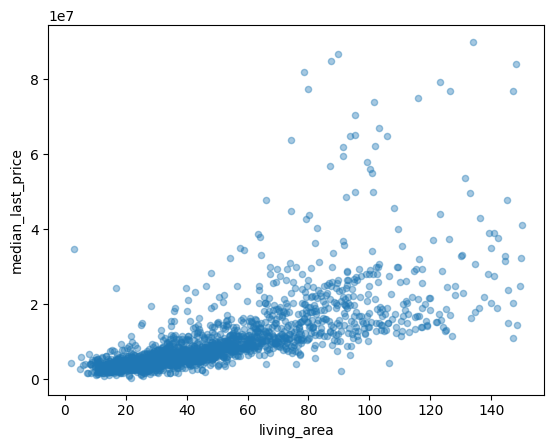

In [91]:
corr_print('living_area')

plotting_function('living_area', xmax=150, xmin=0, ymin=0, ymax=1e8)

*Корреляция между жилой площадью и ценой сигнализирует о том, что линейная зависимость между величинами не такая сильная. По графику можно заметить, что линейная положительная зависимость наиболее выражена на значениях жилой площади до 60 квадратных метров. Для более больших значений жилой площади зависимость не такая сильная, так как разброс точек на графике выше.*

Корреляция между kitchen_area и ценой за объект недвижимости: 0.53


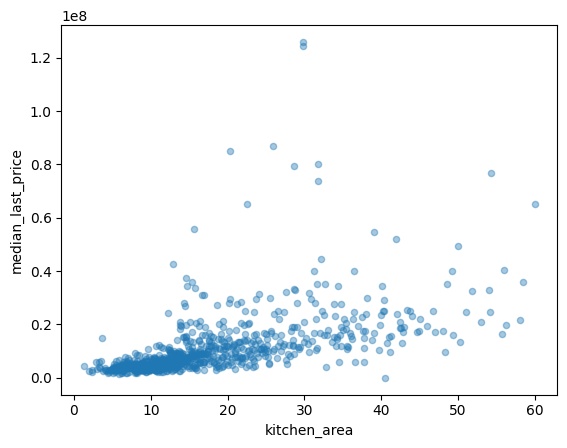

In [92]:
corr_print('kitchen_area')

plotting_function('kitchen_area', xmax=60, xmin=0, ymin=0, ymax=2e8)

*Основываясь на значении корреляции между площадью кухни и ценой за объект недвижимости, можно сделать вывод о том, что зависимость между величинами довольно слабая. Судя по графику, прослеживается положительная линейная зависимость для значений площади кухни меньше 20 квадратных метров. Для более крупных значений разброс в цене больше, что сигнализирует об отсутствии линейной зависимости*

Корреляция между rooms и ценой за объект недвижимости: 0.36


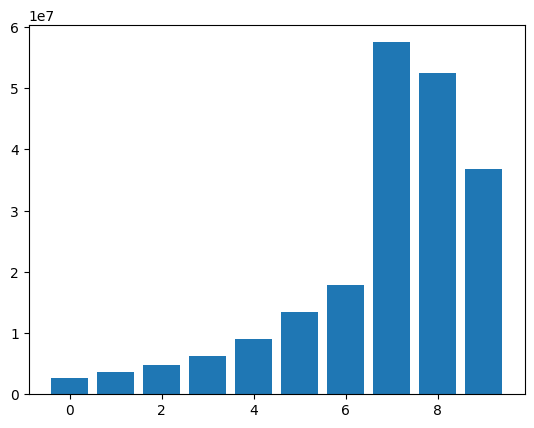

In [93]:
corr_print('rooms')
plotting_bar('rooms', xmin=0, xmax=9)

*Основываясь на значении корреляции, можно сделать вывод о том, что линейная зависимость медлу количеством комнат и ценой слабая. Судя по графику, распределение медианной цены для заданного количества комнат похоже на распределение Пуассона. Цена растет при росте количества комнат при их количестве до 7, а после прослеживается отрицательная зависимость.*

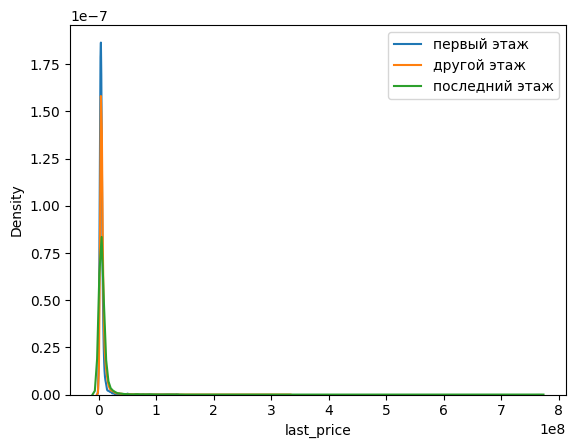

In [94]:
fig = sns.kdeplot(data.query('floor_type == "первый"')['last_price'], label='первый этаж')
fig = sns.kdeplot(data.query('floor_type == "другой"')['last_price'], label='другой этаж')
fig = sns.kdeplot(data.query('floor_type == "последний"')['last_price'], label='последний этаж')
plt.legend()
plt.show()

*Основываясь на графике плотности цены, построенных для трех выборок (первый этаж, другой этаж, последний этаж), можно сделать вывод, что расположение этажа не влияет на цену, так как графики плотностей почти не отличаются друг от друга*

Корреляция между exposition_weekday и ценой за объект недвижимости: -0.0


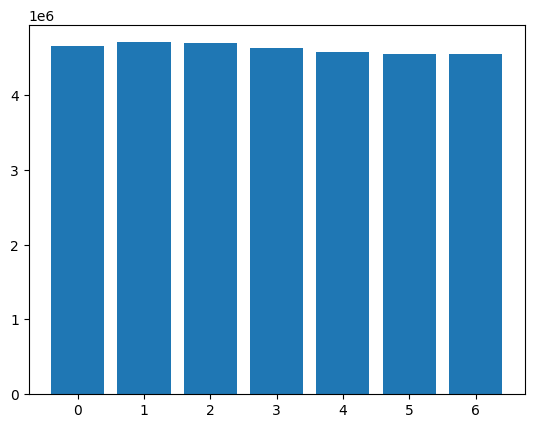

In [95]:
corr_print('exposition_weekday')
plotting_bar('exposition_weekday', xmin=0, xmax=7)

Корреляция между exposition_month и ценой за объект недвижимости: 0.01


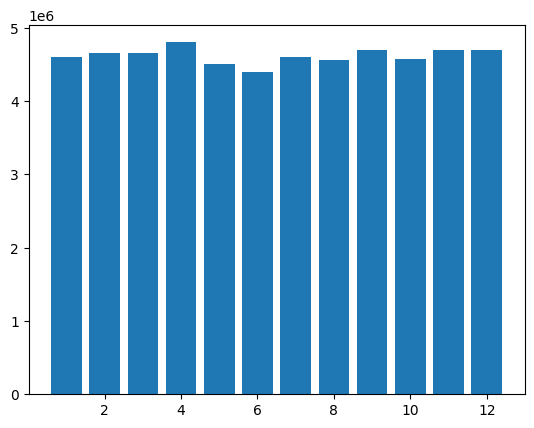

In [96]:
corr_print('exposition_month')
plotting_bar('exposition_month', xmin=0, xmax=12)

Корреляция между exposition_year и ценой за объект недвижимости: -0.04


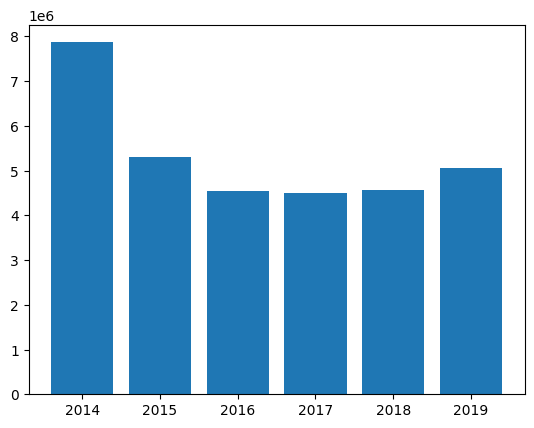

In [97]:
corr_print('exposition_year')
plotting_bar('exposition_year', xmin=min(data['exposition_year']), xmax=max(data['exposition_year']))

*Основываясь на значениях корреляции и на графиках зависимости медианной цены от дней и месяцев размещения объявления, можно сделать вывод о том, что между данными величинами нет линейной зависимости. Рассматривая год размещения объявления, можно заметить, что медианные цены, по сравнению с 2014 годом, упали. Корреляция также сигнализирует об отсутствии линейной зависимости между годом размещения объявления и ценой объекта недвижимости*

#### Анализ средней стоимости квадратного метра в населенных пунктах

In [98]:
data_grouped = data.pivot_table(index=['adjusted_locality_name'], values='locality_name', aggfunc='count').reset_index()
data_grouped.columns = ['adjusted_locality_name', 'count']
top10_popular_localities = data_grouped.sort_values(by='count', ascending=False).head(10).reset_index(drop=True)
top10_popular_localities['average_price_per_meter2'] = ''

for i in range(10):
    local = top10_popular_localities['adjusted_locality_name'][i]
    top10_popular_localities['average_price_per_meter2'][i] = data.query('adjusted_locality_name == @local')\
    ['price_per_meter'].apply('mean').round(2)
    
top10_popular_localities

,adjusted_locality_name,count,average_price_per_meter2
0,Санкт-Петербург,15421,114617.02
1,поселок Мурино,582,85982.63
2,деревня Кудрово,469,95261.96
3,поселок Шушары,437,78575.08
4,Всеволожск,394,68606.71
5,Пушкин,365,103178.08
6,Колпино,336,75500.17
7,поселок Парголово,325,90291.78
8,Гатчина,303,68625.14
9,Выборг,234,58251.09


In [99]:
avg_price = data.pivot_table(index=['adjusted_locality_name'], values='price_per_meter', aggfunc='mean').reset_index()
avg_price.columns = ['adjusted_locality_name', 'average_price_per_meter2']
avg_price['average_price_per_meter2'] = avg_price['average_price_per_meter2'].round(2)

In [100]:
print('Населенные пункты с самой низкой стоимостью квадратного метра:')
display(avg_price.sort_values(by='average_price_per_meter2').head())

Населенные пункты с самой низкой стоимостью квадратного метра:


,adjusted_locality_name,average_price_per_meter2
120,деревня Старополье,11206.22
54,деревня Вахнова Кара,11688.31
55,деревня Выскатка,12335.48
256,поселок Совхозный,12629.13
267,поселок Тесово-4,12931.03


In [101]:
print('Населенные пункты с самой высокой стоимостью квадратного метра:')
display(avg_price.sort_values(by='average_price_per_meter2', ascending=False).head())

Населенные пункты с самой высокой стоимостью квадратного метра:


,adjusted_locality_name,average_price_per_meter2
7,Зеленогорск,115122.80
31,Санкт-Петербург,114617.02
237,поселок Репино,104238.61
30,Пушкин,103178.08
34,Сестрорецк,101694.01


#### Анализ средней стоимости расстояния от объекта недвижимости из Санкт-Петербурга до ценра города в километрах

In [102]:
spb_info = data.query('adjusted_locality_name == " Санкт-Петербург"')[['last_price', 'km_distance_centre']]
spb_info['price_per_km_centre'] = spb_info['last_price'] / spb_info['km_distance_centre']
spb_info['price_per_km_centre'].mean()

inf

*Средняя стоимость одного километра до центра города очень большая. Рассмотрим медиану*

In [103]:
median_price_km_centre = spb_info['price_per_km_centre'].median().round(2)
print(f'Медианная стоимость одного километра до центра города в Санкт-Петербурге: {median_price_km_centre}')

Медианная стоимость одного километра до центра города в Санкт-Петербурге: 469230.77


Корреляция между расстоянием до центра города и ценой за объект недвижимости: -0.26


<AxesSubplot:xlabel='km_distance_centre', ylabel='last_price'>

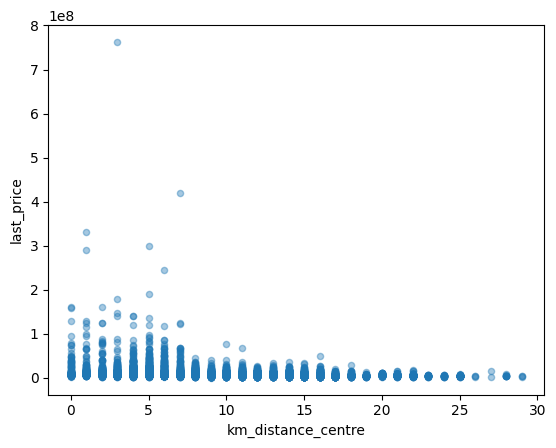

In [104]:
corr = round(spb_info['last_price'].corr(spb_info['km_distance_centre']), 2)
print(f'Корреляция между расстоянием до центра города и ценой за объект недвижимости: {corr}')
spb_info.plot(x='km_distance_centre', y='last_price', kind='scatter', alpha=0.4)

*Как прослеживается из корреляции и из графика, зависимость цены от расстояния до центра города отрицательная, но слабая.*

### Общий вывод

*Подводя итоги, мы завершили исследование объявлений о продаже квартир. Сначала мы получили данные и избавились от пропусков. В процессе, мы выяснили, что нужно обратиться к разработчикам, ответственным за выгрузку данных, о большом количестве пропусков в столбцах с картографическими данными. Более того, не удалось заполнить пропуски в столбцах `ceiling_height`, `kitchen_area` из-за отсутствия достаточной корреляции с другими значениями датафрейма, и в столбце `days_exposition` из-за отсутствия информации о дате удаления объявления и отсутствия факта продажи объекта недвижимости. Также, мы поработали с аномальными значениями в разных столбцах и устранили дубликаты.
<br> Далее, мы исследовали выборку по представленным параметрам. Мы заметили, что распределение многих параметров напомнило распределение Пуассона, а именно: `total_area`, `kitchen_area`, `last_price`, `floor`, `parks_nearest`. У большинства объектов недвижимости из выборки 4 и меньше комнат. Также, большинство квартир из выборки распложены не на первом и не на последнем этажах. Большинство объявлений было выложено в будние дни. Более того, мы исследовали распределение количества дней, в течение которых продавались квартиры, и, основывась на значениях персентилей, пришли к следующему выводу: продажи в течение меньше 1.5 месяцев можно считать быстрами, а которые занимали больше 8 месяцев - долгими.
<br> Потом, мы добавили новые столбцы для удобного анализа и рассмотрели зависимость цены квартиры от различных факторов. При построении графиков, для избежания их загруженности изпользовались медианные значения цены для каждого значения параметра. Можно сделать вывод о том, что цена положительно зависит от общей площади объекта недвижимости, от жилой площадь и площади кухни, но эта зависимость прослеживается только на маленьких значениях площадей (примерно до 125 квадратных метров для общей площади, до 60 квадратных метров для жилой площади и до 20 метров для площади кухни), на больших значениях присутствует большой разброс данных. Цена растет при увеличении количества комнат для выборки квартир с 8 и меньше комнатами, далее прослеживается падение цены при росте количества комнат. Стоимость объектов недвижимости не зависит от типа этажа (рассматривались: первый, последний, другой) и от месяца и дня недели размещения объявления. Также, было замечено необычное поведение медианной цены по году размещения объявления: в 2014 медианная стоимость была наиболее высокой, в последующие года медианная цена упала и держалась на одном уровне до 2019 года.*